<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/Ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimization terminated successfully.
         Current function value: 0.356646
         Iterations: 33
         Function evaluations: 1264


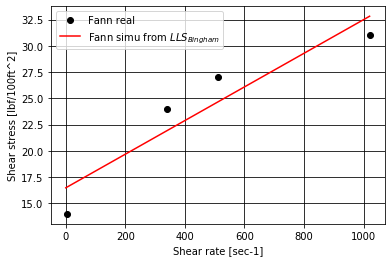

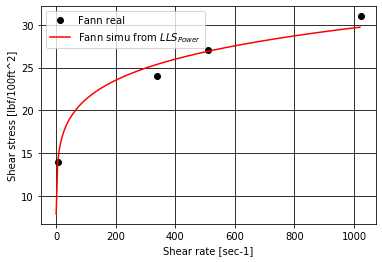

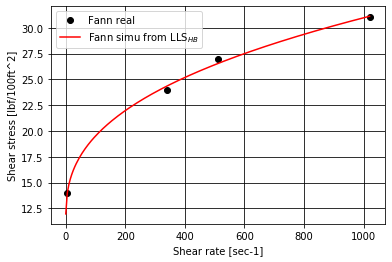

In [0]:
import numpy as np
import matplotlib.pyplot as plt

theta=np.array([31,27,24,14])
gamma=np.array([1022,511,340,5])

theta_cp=theta
gamma_s=gamma
gamma_c=np.arange(0.1,1022,5)

# Bingham Plastic Model

# LLS method implementation

X=np.concatenate((np.ones((4,1)),gamma_s[None].T),axis=1)

Y=theta_cp[None].T

bp=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))

tau0_BP=bp[0]
pv_BP=bp[1]

tau_BP = tau0_BP + pv_BP*gamma_c

SS_t=0
SS_r=0
y_a=np.mean(theta)

for i in range(0,4):
    SS_r=SS_r+(theta[i]-tau0_BP-pv_BP*gamma[i])**2
    SS_t=SS_r+(y_a-tau0_BP-pv_BP*gamma[i])**2

R_BP=1-SS_r/SS_t

plt.figure(1)
plt.plot(gamma_s,theta_cp,'ko')
plt.plot(gamma_c,tau_BP,'r-')

plt.ylabel('Shear stress [lbf/100ft^2]')
plt.xlabel('Shear rate [sec-1]');
plt.legend(('Fann real','Fann simu from $LLS_{Bingham}$'));
plt.grid(color='k')

# Power Law Model

# LLS method implementation 

X=np.concatenate((np.ones((4,1)),np.log(gamma_s[None].T)),axis=1)

Y=np.log(theta_cp[None].T)

pl=np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))

n_PL=pl[1]
K_PL=np.exp(pl[0])

tau_PL = K_PL*(gamma_c)**n_PL

SS_t=0
SS_r=0

for i in range(0,4):
    SS_r=SS_r+(theta[i]-K_PL*gamma[i]**n_PL)**2
    SS_t=SS_r+(y_a-K_PL*gamma[i]**n_PL)**2

R_PL=1-SS_r/SS_t

plt.figure(2)
plt.plot(gamma_s, theta_cp,'ko')
plt.plot(gamma_c, tau_PL,'r-')
plt.ylabel('Shear stress [lbf/100ft^2]')
plt.xlabel('Shear rate [sec-1]')
plt.legend(('Fann real','Fann simu from $LLS_{Power}$'))
plt.grid(color='k')

#H-B model

def objective(x):
    parameter=np.array([[1022,511,340,5],[31,27,24,14]])
    X=parameter[0,:]
    Y=parameter[1,:]
    f=0
    for i in range(0,len(X)):
        f = f+(Y[i]-x[0]-x[1]*X[i]**x[2])**2
    return f


from scipy.optimize import minimize

x0=[15,.1,.9]

sol=minimize(objective,x0,method='powell',options={'disp':True})

(sol.x)
tau0_HB=sol.x[0]
K_HB=sol.x[1]
n_HB=sol.x[2]

tau_HB = tau0_HB+ K_HB*(gamma_c)**n_HB;           #lbf/100ft^2
SS_t=0
SS_r=0
for i in range(0,4):
    SS_r=SS_r+(theta[i]-tau0_HB- K_HB*(gamma[i])**n_HB)**2;
    SS_t=SS_r+(y_a-tau0_HB- K_HB*(gamma[i])**n_HB)**2

R_HB=1-SS_r/SS_t

plt.figure(3)
plt.plot(gamma_s, theta_cp,'ko')
plt.plot(gamma_c, tau_HB,'r-')
plt.ylabel('Shear stress [lbf/100ft^2]');
plt.xlabel('Shear rate [sec-1]');
plt.legend(['Fann real','Fann simu from LLS$_{HB}$']);
plt.grid(color='k')
